In [304]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [305]:
df = pd.read_csv('life_expectancy.csv')
df

,Country,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
0,Chad,57.19,55.24,53.36
1,Nigeria,54.94,54.64,54.33
2,South Sudan,60.75,57.74,54.76
3,Lesotho,60.44,57.80,55.03
4,Central African Republic,59.56,57.67,55.51
...,...,...,...,...
195,Switzerland,85.95,84.09,82.17
196,United Arab Emirates,84.32,83.07,82.17
197,Australia,85.85,84.07,82.28
198,Hong Kong,88.26,85.63,82.97


In [306]:
country_to_continent = {

    # AFRICA
    "Algeria": "Africa", "Angola": "Africa", "Benin": "Africa",
    "Botswana": "Africa", "Burkina Faso": "Africa", "Burundi": "Africa",
    "Cameroon": "Africa", "Cape Verde": "Africa", "Cabo Verde": "Africa",
    "Central African Republic": "Africa", "Chad": "Africa", "Comoros": "Africa",
    "Congo": "Africa", "DR Congo": "Africa", "Côte d'Ivoire": "Africa",
    "Djibouti": "Africa", "Egypt": "Africa", "Equatorial Guinea": "Africa",
    "Eritrea": "Africa", "Eswatini": "Africa", "Ethiopia": "Africa",
    "Gabon": "Africa", "Gambia": "Africa", "Ghana": "Africa",
    "Guinea": "Africa", "Guinea-Bissau": "Africa", "Kenya": "Africa",
    "Lesotho": "Africa", "Liberia": "Africa", "Libya": "Africa",
    "Madagascar": "Africa", "Malawi": "Africa", "Mali": "Africa",
    "Mauritania": "Africa", "Mauritius": "Africa", "Mayotte": "Africa",
    "Morocco": "Africa", "Mozambique": "Africa", "Namibia": "Africa",
    "Niger": "Africa", "Nigeria": "Africa", "Rwanda": "Africa",
    "Réunion": "Africa", "Sao Tome & Principe": "Africa",
    "Senegal": "Africa", "Seychelles": "Africa", "Sierra Leone": "Africa",
    "Somalia": "Africa", "South Africa": "Africa", "South Sudan": "Africa",
    "Sudan": "Africa", "Tanzania": "Africa", "Togo": "Africa",
    "Tunisia": "Africa", "Uganda": "Africa", "Zambia": "Africa",
    "Zimbabwe": "Africa", "Western Sahara": "Africa",

    # ASIA
    "Afghanistan": "Asia", "Armenia": "Asia", "Azerbaijan": "Asia",
    "Bahrain": "Asia", "Bangladesh": "Asia", "Bhutan": "Asia",
    "Brunei": "Asia", "Cambodia": "Asia", "China": "Asia",
    "Cyprus": "Asia", "Georgia": "Asia", "India": "Asia",
    "Indonesia": "Asia", "Iran": "Asia", "Iraq": "Asia",
    "Israel": "Asia", "Japan": "Asia", "Jordan": "Asia",
    "Kazakhstan": "Asia", "Kuwait": "Asia", "Kyrgyzstan": "Asia",
    "Laos": "Asia", "Lebanon": "Asia", "Malaysia": "Asia",
    "Maldives": "Asia", "Mongolia": "Asia", "Myanmar": "Asia",
    "Nepal": "Asia", "North Korea": "Asia", "Oman": "Asia",
    "Pakistan": "Asia", "Palestine": "Asia", "State of Palestine": "Asia",
    "Philippines": "Asia", "Qatar": "Asia", "Russia": "Asia",
    "Saudi Arabia": "Asia", "Singapore": "Asia", "South Korea": "Asia",
    "Sri Lanka": "Asia", "Syria": "Asia", "Taiwan": "Asia",
    "Tajikistan": "Asia", "Thailand": "Asia", "Timor-Leste": "Asia",
    "Turkey": "Asia", "Turkmenistan": "Asia", "United Arab Emirates": "Asia",
    "Uzbekistan": "Asia", "Vietnam": "Asia", "Yemen": "Asia",
    "Hong Kong": "Asia", "Macau": "Asia", "Macao": "Asia",

    # EUROPE
    "Albania": "Europe", "Andorra": "Europe", "Austria": "Europe",
    "Belarus": "Europe", "Belgium": "Europe", "Bosnia and Herzegovina": "Europe",
    "Bulgaria": "Europe", "Croatia": "Europe", "Czech Republic": "Europe",
    "Czech Republic (Czechia)": "Europe", "Denmark": "Europe",
    "Estonia": "Europe", "Finland": "Europe", "France": "Europe",
    "Germany": "Europe", "Greece": "Europe", "Hungary": "Europe",
    "Iceland": "Europe", "Ireland": "Europe", "Italy": "Europe",
    "Kosovo": "Europe", "Latvia": "Europe", "Liechtenstein": "Europe",
    "Lithuania": "Europe", "Luxembourg": "Europe", "Malta": "Europe",
    "Moldova": "Europe", "Monaco": "Europe", "Montenegro": "Europe",
    "Netherlands": "Europe", "North Macedonia": "Europe",
    "Norway": "Europe", "Poland": "Europe", "Portugal": "Europe",
    "Romania": "Europe", "Serbia": "Europe", "Slovakia": "Europe",
    "Slovenia": "Europe", "Spain": "Europe", "Sweden": "Europe",
    "Switzerland": "Europe", "Ukraine": "Europe",
    "United Kingdom": "Europe", "UK": "Europe",

    # NORTH AMERICA
    "Antigua and Barbuda": "North America", "Bahamas": "North America",
    "Barbados": "North America", "Belize": "North America",
    "Canada": "North America", "Costa Rica": "North America",
    "Cuba": "North America", "Dominica": "North America",
    "Dominican Republic": "North America", "El Salvador": "North America",
    "Grenada": "North America", "Guatemala": "North America",
    "Haiti": "North America", "Honduras": "North America",
    "Jamaica": "North America", "Mexico": "North America",
    "Nicaragua": "North America", "Panama": "North America",
    "Saint Kitts and Nevis": "North America", "Saint Lucia": "North America",
    "St. Vincent & Grenadines": "North America", "Trinidad and Tobago": "North America",
    "United States": "North America", "USA": "North America",
    "Puerto Rico": "North America", "Guadeloupe": "North America",
    "Martinique": "North America", "Curaçao": "North America",
    "U.S. Virgin Islands": "North America",

    # SOUTH AMERICA
    "Argentina": "South America", "Bolivia": "South America",
    "Brazil": "South America", "Chile": "South America",
    "Colombia": "South America", "Ecuador": "South America",
    "Guyana": "South America", "Paraguay": "South America",
    "Peru": "South America", "Suriname": "South America",
    "Uruguay": "South America", "Venezuela": "South America",
    "French Guiana": "South America",

    # OCEANIA
    "Australia": "Oceania", "New Zealand": "Oceania",
    "Fiji": "Oceania", "Kiribati": "Oceania", "Marshall Islands": "Oceania",
    "Micronesia": "Oceania", "Nauru": "Oceania", "Palau": "Oceania",
    "Papua New Guinea": "Oceania", "Samoa": "Oceania",
    "Solomon Islands": "Oceania", "Tonga": "Oceania",
    "Tuvalu": "Oceania", "Vanuatu": "Oceania",
    "French Polynesia": "Oceania", "New Caledonia": "Oceania"
}


df["Continent"] = df["Country"].map(country_to_continent)

df["Continent"] = df["Continent"].fillna("Unknown")


In [307]:
missing = df[df["Continent"] == "Unknown"]["Country"].unique()
print(len(missing), "countries became Unknown")
print(missing)


2 countries became Unknown
['Guam' 'Aruba']


In [308]:
df.isnull().sum()

Country                                 0
Sum of Females  Life Expectancy         0
Sum of Life Expectancy  (both sexes)    0
Sum of Males  Life Expectancy           0
Continent                               0
dtype: int64

In [309]:
df.columns

Index(['Country', 'Sum of Females  Life Expectancy',
       'Sum of Life Expectancy  (both sexes)', 'Sum of Males  Life Expectancy',
       'Continent'],
      dtype='object')

accuracy_score: 0.44
confusion_matrix:
 [[9 4 1 1 0 0 0]
 [0 8 2 2 0 0 0]
 [0 2 4 0 0 1 0]
 [0 3 2 1 0 0 0]
 [2 1 2 0 0 0 0]
 [0 0 1 3 0 0 0]
 [0 0 0 1 0 0 0]]


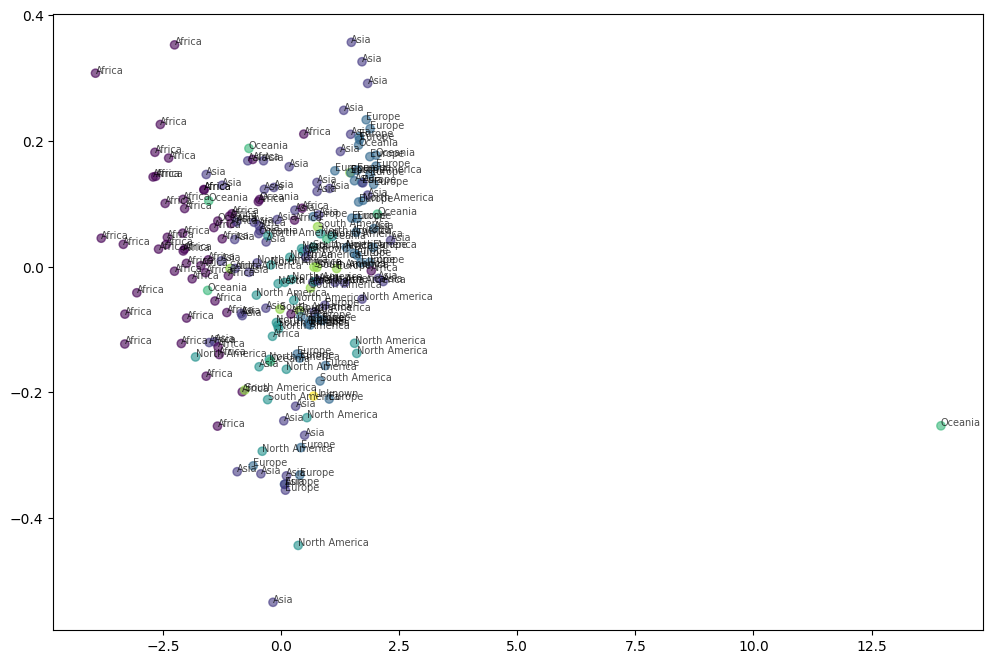

In [310]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Features
X = df[['Sum of Females  Life Expectancy',
        'Sum of Life Expectancy  (both sexes)',
        'Sum of Males  Life Expectancy']]

# Target
y = df["Continent"]

# Scale
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Train-test split
x_train , x_test, y_train , y_test = train_test_split(x_pca, y, random_state=42)

# Model
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train, y_train)

# Prediction
y_pred = model.predict(x_test)

print("accuracy_score:", accuracy_score(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))

# Predict all for plotting
y_pred_all = model.predict(x_pca)

# Encode for scatter colors
le = LabelEncoder()
y_pred_all_encoded = le.fit_transform(y_pred_all)

# PCA plot
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_pred_all_encoded, alpha=0.6)

for i, txt in enumerate(df["Continent"]):
    plt.annotate(txt, (x_pca[i,0], x_pca[i,1]), fontsize=7, alpha=0.7)

plt.show()



In [311]:
df.iloc[x_pca[:,0].argmin()]

Country                                 Nigeria
Sum of Females  Life Expectancy           54.94
Sum of Life Expectancy  (both sexes)      54.64
Sum of Males  Life Expectancy             54.33
Continent                                Africa
Name: 1, dtype: object

In [312]:
df.iloc[x_pca[:,0].argmax()]

Country                                 Micronesia
Sum of Females  Life Expectancy             149.22
Sum of Life Expectancy  (both sexes)        143.28
Sum of Males  Life Expectancy               137.64
Continent                                  Oceania
Name: 199, dtype: object